# 1. Binary Classification

### 1.1 Titanic, but correctly this time

Take your linear regression model from the workshop 3.3 on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

In [29]:
df = sns.load_dataset('titanic')

df['sex'] = df['sex'].replace("male", 0).replace("female", 1)
#df['age'].isna().sum()
#df['sex'].isna().sum()
#df['pclass'].isna().sum()

#Replace Nans in the X columns
df['age'] = df['age'].fillna(df['age'].mean())
df['alone'] = df['alone'].replace(False, 0).replace(True, 1)
df['who'] = df['who'].replace('child', 0).replace('man', 1).replace('woman', 2)
df['adult_male'] = df['adult_male'].replace(False, 0).replace(True, 1)

In [30]:
x = df[['sex', 'age', 'pclass', 'sibsp', 'parch', 'fare', 'who', 'adult_male', 'alone']]
y = df['survived']

lin_model = LinearRegression().fit(x, y)

In [36]:
y_pred = lin_model.predict(x)

#Make the results 0s and 1s so the predictions are binary like the logistic regression results
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]

print(lin_model.score(x, y))
print(classification_report(y, y_pred_binary))

0.4291436690743786
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       549
           1       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [32]:
x = df[['sex', 'age', 'pclass', 'sibsp', 'parch', 'fare', 'who', 'adult_male', 'alone']]
y = df['survived']

log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
log_model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [33]:
y_pred = log_model.predict(x)
print(log_model.score(x, y))
print(classification_report(y, y_pred))


#precision, f1 score all are more or less the same as linear regression
#however, the r2 score for logistic regression is much much better than linear regression

0.8237934904601572
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



# 2. Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.

- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 
```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.

- You should be able to get at least 80% on a test set size of 10_000

In [54]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

In [55]:
X = mnist['data']
y = mnist['target']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10_000)

log_model = LogisticRegression(solver='saga', tol=0.2).fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print(log_model.score(X_test, y_test))

0.9205


# 3. Counting Poissons

The `data/fish.csv` is a data set of camping trips taken by 250 groups of people.

- The campers may or may not have done some fishing during their trip.
- If a group did some fishing, they would have caught zero or mor fish.
- We want to estimate not only how many fish were caught (if there was fishing done by a camping group), but also the probability that the camping group caught any fish at all.

Here's info on the columns:

**FISH_COUNT:** The number of fish that were caught. This will be our dependent variable y.

**LIVE_BAIT:** A binary variable indicating whether live bait was used.

**CAMPER:** Whether the fishing group used a camper van.

**PERSONS:** Total number of people in the fishing group. Note that in some groups, none of them may have fished.

**CHILDREN:** The number of children in the camping group.

Your task is to predict the number of fish caught (FISH_COUNT) by a camping group based on the values of LIVE_BAIT, CAMPER, PERSONS and CHILDREN variables.

Use what we learned on count variables and zero-inflated datasets to achieve the best model you can.

Interpret the models you used to give an analysis of each feature's effect on the predicted fish caught.

**N.B.** Please appreciate the effort I went through to find a fish dataset for a count problem pun.

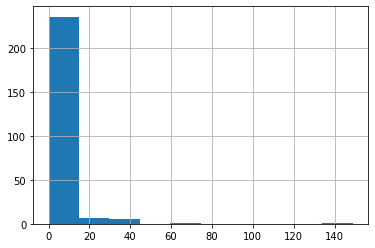

In [11]:
df = pd.read_csv('data/fish.csv')

df['FISH_COUNT'].hist()

#Many zeroes so lets try to use the zero inflated poisson regression

In [13]:
y = df['FISH_COUNT']
X = df.drop(columns=['FISH_COUNT'])
x = sm.add_constant(X)

est = sm.ZeroInflatedPoisson(y, x).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 2.943385
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:              FISH_COUNT   No. Observations:                  250
Model:             ZeroInflatedPoisson   Df Residuals:                      245
Method:                            MLE   Df Model:                            4
Date:                 Sat, 06 Feb 2021   Pseudo R-squ.:                  0.3471
Time:                         10:24:20   Log-Likelihood:                -735.85
converged:                        True   LL-Null:                       -1127.0
Covariance Type:             nonrobust   LLR p-value:                5.101e-168
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.4805      0.177     -2.720      0.007      -0.827      -0.134
const            -2.5327      0.278     -9.099      0.000      -3.078      -1.987
LIVE_BAIT         1.7086      0.242      7.073      0.000       1.235       2.182
CAMPER            0.6745      0.094      7.191      0.000       0.491       0.858
PERSONS           0.8752      0.043     20.447      0.000       0.791       0.959
CHILDREN         -1.3957      0.090    -15.582      0.000      -1.571      -1.220
=================================================================================
"""

In [19]:
y = df['FISH_COUNT']
X = df.drop(columns=['FISH_COUNT'])
x = sm.add_constant(X)

est = sm.Poisson(y, x).fit()
est.summary() #normal poisson regression gives a better r-squared value

Optimization terminated successfully.
         Current function value: 3.167911
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             FISH_COUNT   No. Observations:                  250
Model:                        Poisson   Df Residuals:                      245
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 Feb 2021   Pseudo R-squ.:                  0.5193
Time:                        10:33:34   Log-Likelihood:                -791.98
converged:                       True   LL-Null:                       -1647.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3901      0.265    -12.797      0.000      -3.909      -2.871
LIVE_BAIT      1.6697      0.233      7.160      0.000       1.213       2.127
CAMPER         0.8001      0.089      8.943      0.000       0.625       0.975
PERSONS        1.0740      0.039     27.534      0.000       0.998       1.150
CHILDREN      -1.7099      0.081    -21.005      0.000      -1.869      -1.550
==============================================================================
"""

In [20]:
#Attempt the two stage modelling approach shown in class
#Stage 1
est1 = sm.Logit((y > 0).astype(int), x).fit()

# Prep Stage 2
X = pd.DataFrame(sm.add_constant(x))
X['stage1'] = est1.predict(X)

# Stage 2
est2 = sm.OLS(y, X).fit()
est2.summary() #Lower r-squared than normal poisson regression

Optimization terminated successfully.
         Current function value: 0.495335
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FISH_COUNT   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     13.05
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           2.90e-11
Time:                        10:33:44   Log-Likelihood:                -938.12
No. Observations:                 250   AIC:                             1888.
Df Residuals:                     244   BIC:                             1909.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4807      2.556     -4.100      0.000     -15.516      -5.445
LIVE_BAIT      6.3331      2.468      2.566      0.011       1.471      11.195
CAMPER         6.9381      2.233      3.108      0.002       2.541      11.336
PERSONS        9.5638      2.288      4.180      0.000       5.058      14.070
CHILDREN     -14.1342      3.950     -3.578      0.000     -21.915      -6.353
stage1       -23.8062     10.774     -2.210      0.028     -45.028      -2.584
==============================================================================
Omnibus:                      420.458   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114163.931
Skew:                           8.715   Prob(JB):                         0.00
Kurtosis:                     106.228   Cond. No.                         57.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**- In general, the coefficients in a poisson regression can be interpreted as follows: for a one unit change in the predictor variable, the difference in the logs of expected counts is expected to change by the respective regression coefficient, given the other predictor variables in the model are held constant.**

So with that in mind, it can be seen that having live bait, a camper and more people yielded better results when it comes to catching fish and having children around made the yield worse. The p-values are less than 0.05 as well!

# 5. Survival Question

The `data/telco_churn.csv` dataset comes from [here](https://www.kaggle.com/blastchar/telco-customer-churn) and here is the description:

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


**5.1 StreamingTV churn**

The `Tenure` column is how long the customer lasted. Make the survival curve for both the group using StreamingTV and the one not using it in the dataset

![](streamingtv.png)


**5.2 Survival Regression**

Use either lifelines or statsmodels to implement a survival regression model predicting tenure. Don't forget to use the churn column as the event column.

In [61]:
df = pd.read_csv('data/telco_churn.csv')

In [62]:
#Drop unnecessary columns and blank rows
df = df.drop(columns=['customerID'])

df.TotalCharges = df.TotalCharges[df.TotalCharges != ' ']

In [63]:
#Data prep
df.TotalCharges = pd.to_numeric(df.TotalCharges)

#OHE
df.gender = df.gender.replace('Female', 0).replace('Male', 1)
df.InternetService = df.InternetService.replace('DSL', 0).replace('Fiber optic', 1).replace('No', 2)
df.MultipleLines = df.MultipleLines.replace('No phone service', 0).replace('Yes', 1).replace('No', 2)
df.Contract = df.Contract.replace('Month-to-month', 0).replace('Two year', 1).replace('One year', 2)
df.PaymentMethod = (df.PaymentMethod.replace('Mailed check', 0).replace('Electronic check', 1)
                                    .replace('Credit card (automatic)', 2).replace('Bank transfer (automatic)', 3))


cat_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in cat_cols:
    df[col] = df[col].replace('Yes', 0).replace('No', 1).replace('No internet service', 2)
    
for col in binary_cols:
    df[col] = df[col].replace('Yes', 0).replace('No', 1)
    
df = df.dropna() #just 11 nans so just going to drop them

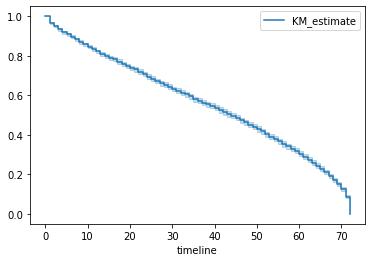

In [64]:
from lifelines import KaplanMeierFitter

T = df['tenure']
E = df['Churn']

kmf = KaplanMeierFitter()
kmf.fit(T, E)
kmf.plot_survival_function()

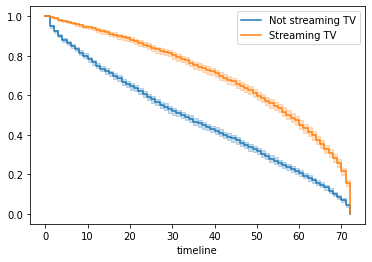

In [65]:
groups = df['StreamingTV']
ix = (groups == 0)
kmf.fit(T[~ix], E[~ix], label='Not streaming TV')
ax = kmf.plot_survival_function()
kmf.fit(T[ix], E[ix], label='Streaming TV')
ax = kmf.plot_survival_function(ax=ax)

<lifelines.CoxPHFitter: fitted with 7032 total observations, 1869 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 5163
   partial log-likelihood = -36492.24
         time fit was run = 2021-02-07 04:17:16 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
gender            -0.03       0.97       0.03            -0.09             0.02                 0.92                 1.02
SeniorCitizen     -0.15       0.86       0.04            -0.23            -0.06                 0.79                 0.94
Partner            0.32       1.37       0.03             0.25             0.38                 1.29                 1.46
Dependents        -0.03       0.97       0.03            -0.10             0.04                 0.91                 1.04
PhoneService       0.49       1.63       0.14             0.21             0.77                 1.24                 2.15
MultipleLines      0.37       1.45       0.04             0.30             0.45                 1.35                 1.56
InternetService   -0.53       0.59       0.09            -0.69            -0.36                 0.50                 0.70
OnlineSecurity     0.04       1.04       0.05            -0.06             0.13                 0.95                 1.14
OnlineBackup       0.03       1.04       0.04            -0.05             0.12                 0.95                 1.13
DeviceProtection   0.08       1.08       0.04            -0.01             0.16                 0.99                 1.18
TechSupport       -0.02       0.98       0.04            -0.11             0.06                 0.90                 1.07
StreamingTV        0.20       1.22       0.06             0.08             0.31                 1.09                 1.37
StreamingMovies    0.19       1.21       0.06             0.08             0.31                 1.08                 1.36
Contract          -0.03       0.97       0.02            -0.07             0.02                 0.93                 1.02
PaperlessBilling   0.08       1.08       0.03             0.02             0.14                 1.02                 1.15
PaymentMethod     -0.19       0.83       0.01            -0.21            -0.16                 0.81                 0.85
MonthlyCharges     0.05       1.05       0.00             0.05             0.06                 1.05                 1.06
TotalCharges      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                      z      p   -log2(p)
covariate                                
gender            -1.09   0.28       1.85
SeniorCitizen     -3.34 <0.005      10.22
Partner            9.48 <0.005      68.47
Dependents        -0.93   0.35       1.50
PhoneService       3.47 <0.005      10.90
MultipleLines      9.75 <0.005      72.18
InternetService   -6.18 <0.005      30.51
OnlineSecurity     0.77   0.44       1.17
OnlineBackup       0.77   0.44       1.18
DeviceProtection   1.70   0.09       3.50
TechSupport       -0.51   0.61       0.71
StreamingTV        3.40 <0.005      10.55
StreamingMovies    3.30 <0.005      10.00
Contract          -1.11   0.27       1.91
PaperlessBilling   2.60   0.01       6.74
PaymentMethod    -13.77 <0.005     140.82
MonthlyCharges    14.26 <0.005     150.75
TotalCharges     -55.57 <0.005        inf
---
Concordance = 0.85
Partial AIC = 73020.47
log-likelihood ratio test = 6389.60 on 18 df
-log2(p) of ll-ratio test = inf

None


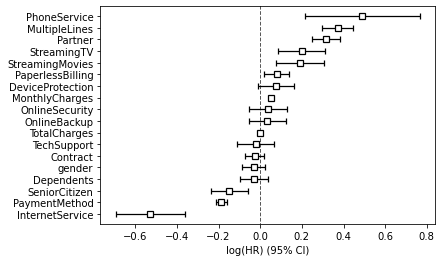

In [66]:
#5.2 Survival regression

from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df, 'tenure', event_col='Churn')
print(cph.print_summary())
cph.plot()